<a href="https://colab.research.google.com/github/UmaNagirireddi/ML_Assignment4/blob/main/ML_Ast4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_recall_curve,
    precision_score, recall_score, f1_score, average_precision_score, log_loss
)
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR

# Disable warnings
warnings.filterwarnings("ignore")


In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/cancer.csv')

# Display the tail of the DataFrame
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
df = df.drop(columns=['id', 'Unnamed: 32']).replace({'diagnosis': {'B': 0, 'M': 1}})
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
X, y = df.drop(columns=['diagnosis']), df['diagnosis']
xScaled = StandardScaler().fit_transform(X)

xScaled.shape

(569, 30)

In [ ]:
np.random.seed(9)

In [6]:
accuracy, precision, recall, f1Score = [], [], [], []

for k in range(1, 30, 2):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(xScaled)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, train_size=0.8, test_size=0.20, random_state=100)

    classifier = SVC(kernel='linear', C=10).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc, prec, rec, f1 = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)

    print(f"for k = {k}, accuracy = {acc}, precision = {prec}, recall = {rec}, and f1score = {f1}")



for k = 1, accuracy = 0.9122807017543859, precision = 0.9333333333333333, recall = 0.8571428571428571, and f1score = 0.8936170212765957
for k = 3, accuracy = 0.9649122807017544, precision = 0.9591836734693877, recall = 0.9591836734693877, and f1score = 0.9591836734693877
for k = 5, accuracy = 0.9649122807017544, precision = 0.9787234042553191, recall = 0.9387755102040817, and f1score = 0.9583333333333333
for k = 7, accuracy = 0.956140350877193, precision = 0.9782608695652174, recall = 0.9183673469387755, and f1score = 0.9473684210526316
for k = 9, accuracy = 0.9736842105263158, precision = 1.0, recall = 0.9387755102040817, and f1score = 0.968421052631579
for k = 11, accuracy = 0.956140350877193, precision = 0.9583333333333334, recall = 0.9387755102040817, and f1score = 0.9484536082474228
for k = 13, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, and f1score = 0.9387755102040817
for k = 15, accuracy = 0.956140350877193, precision = 0.95833333

In [7]:
k_list = [i for i in range(1,30,2)]
k_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

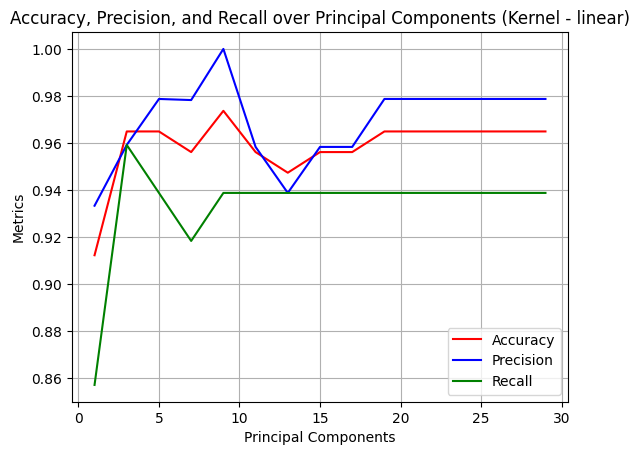

In [8]:
plt.figure()

for metric, color, label in zip([accuracy, precision, recall], ['red', 'blue', 'green'], ['Accuracy', 'Precision', 'Recall']):
    plt.plot(k_list, metric, color=color, label=label)

plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernel - linear)')
plt.legend()
plt.show()

It appears that utilizing 13 principal components yields the highest levels of accuracy, precision, and recall, suggesting that k = 13 is the most suitable choice for the linear kernel when considering these performance metrics.

In [9]:
accuracy, precision, recall, f1Score = [], [], [], []

for k in range(1, 30, 2):
    principalComponents = PCA(n_components=k).fit_transform(xScaled)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, train_size=0.8, test_size=0.20, random_state=100)

    classifier = SVC(kernel='rbf', C=10).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc, prec, rec, f1 = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)

    print(f"for k = {k}, accuracy = {acc}, precision = {prec}, recall = {rec}, and f1score = {f1}")


for k = 1, accuracy = 0.9122807017543859, precision = 0.9333333333333333, recall = 0.8571428571428571, and f1score = 0.8936170212765957
for k = 3, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, and f1score = 0.9387755102040817
for k = 5, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, and f1score = 0.9387755102040817
for k = 7, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, and f1score = 0.9387755102040817
for k = 9, accuracy = 0.9736842105263158, precision = 0.9791666666666666, recall = 0.9591836734693877, and f1score = 0.9690721649484536
for k = 11, accuracy = 0.9736842105263158, precision = 0.9791666666666666, recall = 0.9591836734693877, and f1score = 0.9690721649484536
for k = 13, accuracy = 0.9649122807017544, precision = 0.9787234042553191, recall = 0.9387755102040817, and f1score = 0.9583333333333333
for k = 15, accuracy = 0.9649122807017544, pre

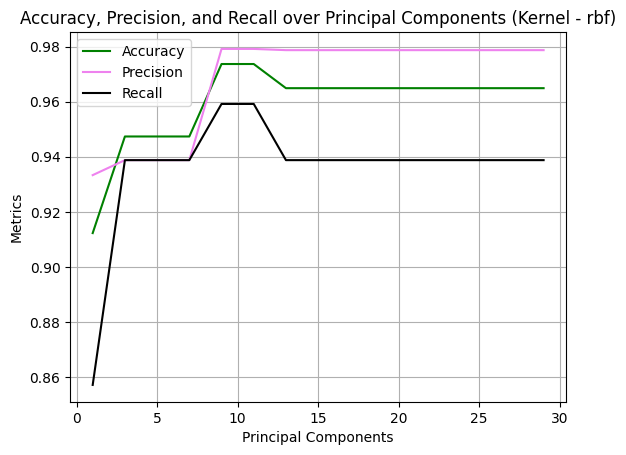

In [10]:
plt.figure()

metrics = [accuracy, precision, recall]
colors = ['green', 'violet', 'black']
labels = ['Accuracy', 'Precision', 'Recall']

for metric, color, label in zip(metrics, colors, labels):
    plt.plot(k_list, metric, color=color, label=label)

plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernel - rbf)')
plt.legend()
plt.show()

it is evident that 5 principal components are providing the best accuracy, precision and recall.

so, k = 5 is the optimal value (considering accuracy, precision and recall) for rbf kernel

In [11]:
accuracy, precision, recall, f1Score = [], [], [], []

for k in range(1, 30, 2):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(xScaled)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, train_size=0.8, test_size=0.20, random_state=100)

    classifier = SVC(kernel='poly', C=10000).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc, prec, rec, f1 = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)

    print(f"For k = {k}, accuracy = {acc:.4f}, precision = {prec:.4f}, recall = {rec:.4f}, and f1score = {f1:.4f}")


For k = 1, accuracy = 0.8860, precision = 0.9737, recall = 0.7551, and f1score = 0.8506
For k = 3, accuracy = 0.9825, precision = 0.9796, recall = 0.9796, and f1score = 0.9796
For k = 5, accuracy = 0.9298, precision = 0.9020, recall = 0.9388, and f1score = 0.9200
For k = 7, accuracy = 0.9123, precision = 0.9149, recall = 0.8776, and f1score = 0.8958
For k = 9, accuracy = 0.9386, precision = 0.9375, recall = 0.9184, and f1score = 0.9278
For k = 11, accuracy = 0.9386, precision = 0.9375, recall = 0.9184, and f1score = 0.9278
For k = 13, accuracy = 0.9474, precision = 0.9388, recall = 0.9388, and f1score = 0.9388
For k = 15, accuracy = 0.9474, precision = 0.9216, recall = 0.9592, and f1score = 0.9400
For k = 17, accuracy = 0.9386, precision = 0.9200, recall = 0.9388, and f1score = 0.9293
For k = 19, accuracy = 0.9386, precision = 0.9200, recall = 0.9388, and f1score = 0.9293
For k = 21, accuracy = 0.9561, precision = 0.9583, recall = 0.9388, and f1score = 0.9485
For k = 23, accuracy = 0.9

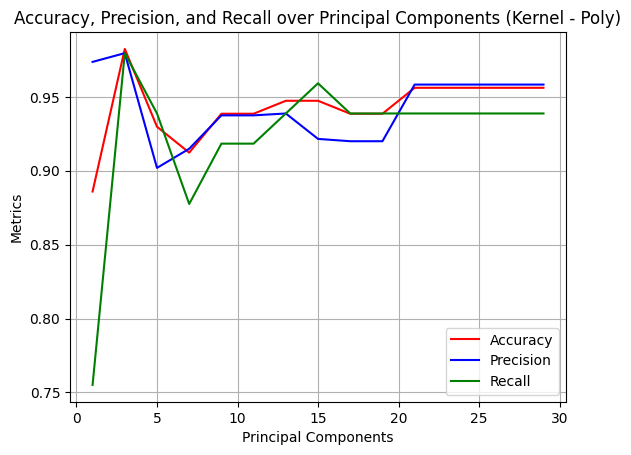

In [12]:
plt.figure()
metrics = [(accuracy, 'red', 'Accuracy'), (precision, 'blue', 'Precision'), (recall, 'green', 'Recall')]

for metric, color, label in metrics:
    plt.plot(k_list, metric, color=color, label=label)

plt.grid(), plt.xlabel('Principal Components'), plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernel - Poly)'), plt.legend()
plt.show()

**Problem 2**

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
df = pd.read_csv('/content/Housing.csv')

df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [15]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
output_features = 'price'

In [16]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [17]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [18]:
np.random.seed(9)
train_data, test_data = train_test_split(df[input_features + [output_features]], train_size=0.8, test_size=0.2, random_state=100)
train_data.shape, test_data.shape

((436, 12), (109, 12))

In [19]:
X_train, y_train, X_test, y_test = train_data[input_features].to_numpy(), train_data[['price']].to_numpy(), test_data[input_features].to_numpy(), test_data[['price']].to_numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((436, 11), (436, 1), (109, 11), (109, 1))

In [20]:
# Initialize a StandardScaler
scalar = StandardScaler()

# Scale the training and test data
x_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.transform(X_test)

# Initialize SVR models with different kernels
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Fit the models and predict on the test data
y_rbf, y_lin, y_poly = svr_rbf.fit(x_train_scaled, y_train).predict(x_test_scaled), svr_lin.fit(x_train_scaled, y_train).predict(x_test_scaled), svr_poly.fit(x_train_scaled, y_train).predict(x_test_scaled)

In [22]:
rbf_error, lin_error, poly_error = mean_squared_error(y_test, y_rbf) ** 0.5, mean_squared_error(y_test, y_lin) ** 0.5, mean_squared_error(y_test, y_poly) ** 0.5


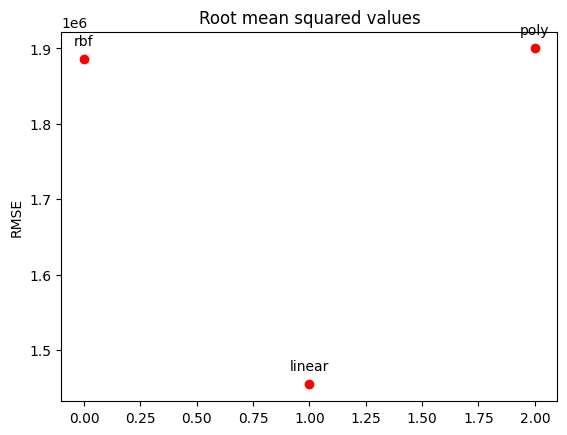

In [23]:
error = [rbf_error, lin_error, poly_error]
values = ['rbf', 'linear', 'poly']

plt.scatter(range(len(error)), error, marker='o', color='Red', label='Data Points')
[plt.annotate(value, (i, error[i]), textcoords="offset points", xytext=(0, 10), ha='center') for i, value in enumerate(values)]

plt.ylabel('RMSE')
plt.title('Root mean squared values')
plt.show()

In [24]:
scalar = StandardScaler()
X, y = df[input_features], df[output_features]
xScaled = scalar.fit_transform(X)
max_k = xScaled.shape[1]

In [25]:
accuracy, rmse = [], []

for k in range(1, max_k + 1):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(xScaled)
    train_X, test_X, train_Y, test_Y = train_test_split(principalComponents, y, train_size=0.8, test_size=0.20, random_state=100)

    model = SVR(kernel='linear', C=100000).fit(train_X, train_Y)
    y_pred = model.predict(test_X)

    acc = model.score(test_X, test_Y)
    rms = mean_squared_error(test_Y, y_pred) ** 0.5

    accuracy.append(acc)
    rmse.append(rms)

    print(f"for k = {k}, accuracy is {acc}, and Root mean squared value is {rms}")

for k = 1, accuracy is 0.6803158885707415, and Root mean squared value is 1062223.590184747
for k = 2, accuracy is 0.6802054943477552, and Root mean squared value is 1062406.9793836528
for k = 3, accuracy is 0.6808498198827848, and Root mean squared value is 1061336.1650266778
for k = 4, accuracy is 0.6809378719023328, and Root mean squared value is 1061189.7461222606
for k = 5, accuracy is 0.6748753489623834, and Root mean squared value is 1071224.1763571054
for k = 6, accuracy is 0.6653849721032365, and Root mean squared value is 1086746.2167313218
for k = 7, accuracy is 0.6772120225199227, and Root mean squared value is 1067367.786375699
for k = 8, accuracy is 0.6776371527978924, and Root mean squared value is 1066664.662492134
for k = 9, accuracy is 0.6572393340800122, and Root mean squared value is 1099894.1827066718
for k = 10, accuracy is 0.6563776074769626, and Root mean squared value is 1101275.923968242
for k = 11, accuracy is 0.6806896152339323, and Root mean squared value i

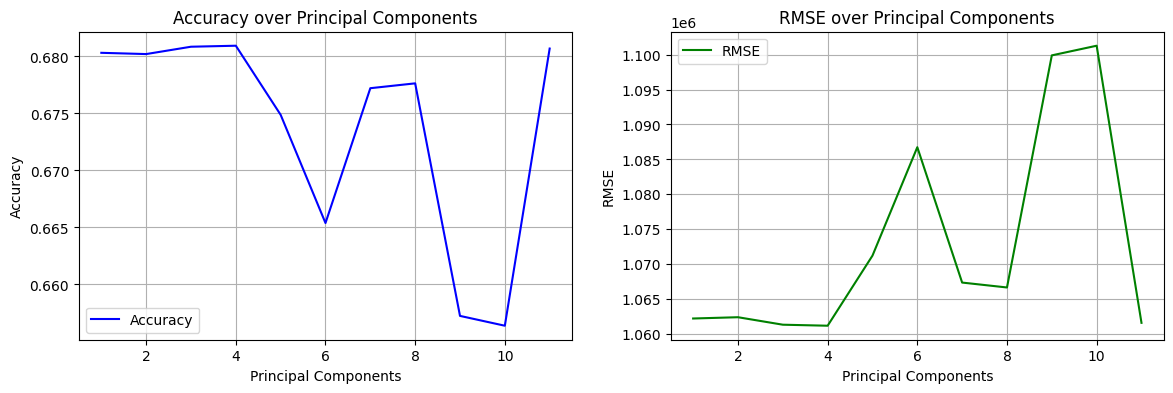

In [26]:
plt.figure(figsize=(14, 4))

for i, (metric, color, title, ylabel) in enumerate(zip([accuracy, rmse], ['Blue', 'Green'], ['Accuracy', 'RMSE'], ['Accuracy', 'RMSE'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(1, max_k + 1), metric, color=color, label=title)
    plt.grid()
    plt.xlabel('Principal Components')
    plt.ylabel(ylabel)
    plt.title(f'{title} over Principal Components')
    plt.legend()

plt.show()

In [27]:
accuracy, rmse = [], []

for k in range(1, max_k + 1):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(xScaled)
    train_X, test_X, train_Y, test_Y = train_test_split(principalComponents, y, train_size=0.8, test_size=0.20, random_state=100)

    model = SVR(kernel='rbf', C=100000).fit(train_X, train_Y)
    y_pred = model.predict(test_X)

    acc = model.score(test_X, test_Y)
    rms = mean_squared_error(test_Y, y_pred, squared=False)  # Calculate RMSE
    accuracy.append(acc)
    rmse.append(rms)

    print(f"For k = {k}, accuracy: {acc}, RMSE: {rms}")


For k = 1, accuracy: 0.5782990568228806, RMSE: 1219994.021115353
For k = 2, accuracy: 0.5818165471926999, RMSE: 1214895.2615713775
For k = 3, accuracy: 0.5858183678131988, RMSE: 1209068.2971882569
For k = 4, accuracy: 0.5879027527835323, RMSE: 1206022.1185320052
For k = 5, accuracy: 0.5803798265804682, RMSE: 1216980.4330818756
For k = 6, accuracy: 0.5573860678713225, RMSE: 1249878.956532986
For k = 7, accuracy: 0.5632954992918969, RMSE: 1241507.2214191742
For k = 8, accuracy: 0.5432786892812105, RMSE: 1269641.338660394
For k = 9, accuracy: 0.5324014111614597, RMSE: 1284671.270742172
For k = 10, accuracy: 0.5314882351834337, RMSE: 1285925.0798608593
For k = 11, accuracy: 0.529147043835095, RMSE: 1289134.012075841


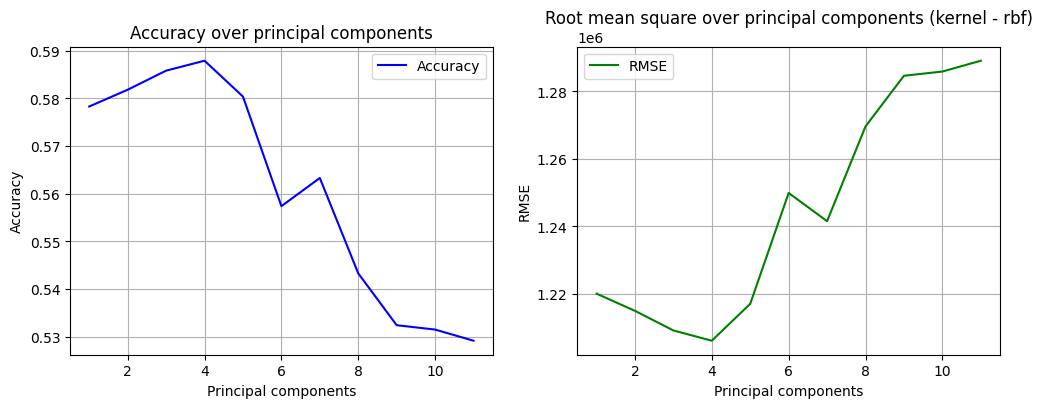

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, metric, color, label, title in zip(axes, [accuracy, rmse], ['blue', 'green'], ['Accuracy', 'RMSE'], ['Accuracy over principal components', 'Root mean square over principal components (kernel - rbf)']):
    ax.plot(range(1, max_k + 1), metric, color=color, label=label)
    ax.grid()
    ax.set_xlabel('Principal components')
    ax.set_ylabel(label)
    ax.set_title(title)
    ax.legend()

plt.show()

In [30]:
accuracy, rmse = [], []

for k in range(1, max_k + 1):
    principalComponents = PCA(n_components=k).fit_transform(xScaled)
    train_X, test_X, train_Y, test_Y = train_test_split(principalComponents, y, train_size=0.8, test_size=0.20, random_state=100)

    model = SVR(kernel='poly', C=100000).fit(train_X, train_Y)
    acc = model.score(test_X, test_Y)

    y_pred = model.predict(test_X)
    rms = mean_squared_error(test_Y, y_pred) ** 0.5

    accuracy.append(acc)
    rmse.append(rms)

    print(f"for k = {k}, accuracy = {acc}, and root mean square value = {rms}")



for k = 1, accuracy = 0.3171416640822464, and root mean square value = 1552461.0890908493
for k = 2, accuracy = 0.467703920207434, and root mean square value = 1370667.2938724349
for k = 3, accuracy = 0.4464046969979035, and root mean square value = 1397821.172876912
for k = 4, accuracy = 0.5100900216474921, and root mean square value = 1314963.0779340859
for k = 5, accuracy = 0.5305639334635275, and root mean square value = 1287192.9211478487
for k = 6, accuracy = 0.5786342292974227, and root mean square value = 1219509.092512376
for k = 7, accuracy = 0.585931952198351, and root mean square value = 1208902.4995222948
for k = 8, accuracy = 0.5878494724865034, and root mean square value = 1206100.0796689743
for k = 9, accuracy = 0.5680265211729172, and root mean square value = 1234763.9975372304
for k = 10, accuracy = 0.5688576352818713, and root mean square value = 1233575.5867664812
for k = 11, accuracy = 0.5688748047948929, and root mean square value = 1233551.0239947601


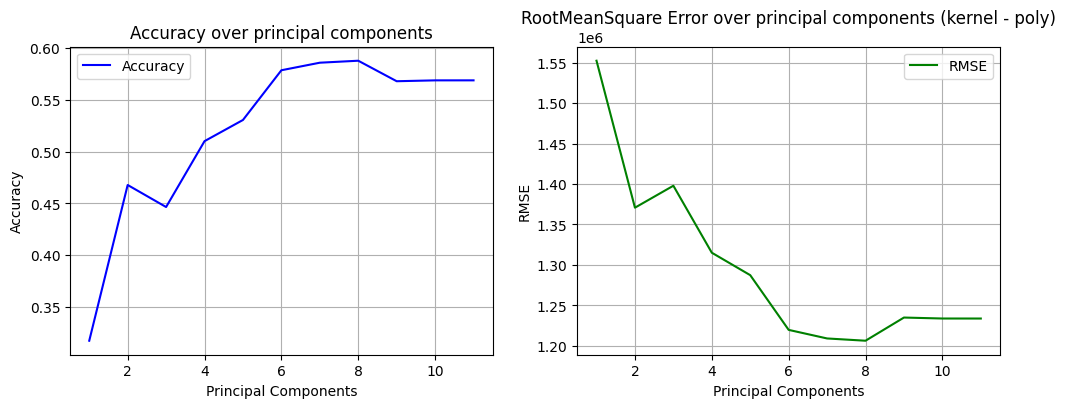

In [31]:
plt.figure(figsize=(12, 4))

for i, (metric, title, ylabel, color, label) in enumerate(zip([accuracy, rmse],
                                                              ['Accuracy over principal components', 'RootMeanSquare Error over principal components (kernel - poly)'],
                                                              ['Accuracy', 'RMSE'],
                                                              ['Blue', 'Green'],
                                                              ['Accuracy', 'RMSE'])):

    plt.subplot(1, 2, i + 1)
    plt.plot(range(1, max_k + 1), metric, color=color, label=label)
    plt.grid()
    plt.xlabel('Principal Components')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

plt.show()
